In [1]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

Using TensorFlow backend.


In [237]:
import math

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

In [8]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


### IMDB Test

In [9]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [11]:
max_features = 10000
maxlen = 500
batch_size = 32

In [12]:
print('laoding data..')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

laoding data..


In [20]:
print(len(input_train), 'train_')
print(len(input_test), 'test_')

print(input_train.shape)
print(input_test.shape)

25000 train_
25000 test_
(25000, 500)
(25000, 500)


In [18]:
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

input_train.shape
input_test.shape

(25000, 500)

In [21]:
input_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [24]:
from keras.layers import Dense

In [25]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [28]:
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.6436 - acc: 0.6129 - val_loss: 0.5216 - val_acc: 0.7468
Epoch 2/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.4146 - acc: 0.8208 - val_loss: 0.7700 - val_acc: 0.6730
Epoch 3/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.2998 - acc: 0.8814 - val_loss: 0.4620 - val_acc: 0.7832
Epoch 4/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.2305 - acc: 0.9086 - val_loss: 0.4170 - val_acc: 0.8180
Epoch 5/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.1611 - acc: 0.9420 - val_loss: 0.3990 - val_acc: 0.8474
Epoch 6/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.1007 - acc: 0.9651 - val_loss: 0.4515 - val_acc: 0.8362
Epoch 7/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.0633 - acc: 0.9798 - val_loss: 0.5357 - val_acc:

In [29]:
import matplotlib.pyplot as plt

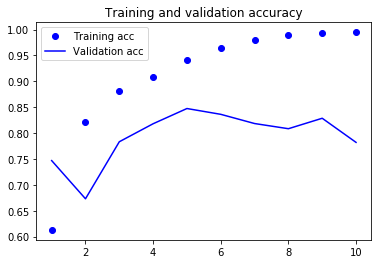

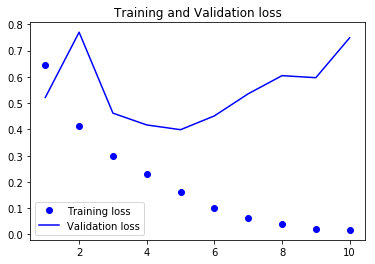

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [32]:
from keras.layers import LSTM

In [33]:
model = Sequential()

In [35]:
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 79s 4ms/step - loss: 0.5070 - acc: 0.7635 - val_loss: 0.4063 - val_acc: 0.8498
Epoch 2/10
20000/20000 [==============================] - 77s 4ms/step - loss: 0.2915 - acc: 0.8881 - val_loss: 0.2793 - val_acc: 0.8872
Epoch 3/10
20000/20000 [==============================] - 75s 4ms/step - loss: 0.2325 - acc: 0.9108 - val_loss: 0.3228 - val_acc: 0.8830
Epoch 4/10
20000/20000 [==============================] - 81s 4ms/step - loss: 0.2009 - acc: 0.9271 - val_loss: 0.5821 - val_acc: 0.8344
Epoch 5/10
20000/20000 [==============================] - 77s 4ms/step - loss: 0.1752 - acc: 0.9377 - val_loss: 0.3368 - val_acc: 0.8714
Epoch 6/10
20000/20000 [==============================] - 84s 4ms/step - loss: 0.1550 - acc: 0.9426 - val_loss: 0.4035 - val_acc: 0.8688
Epoch 7/10
20000/20000 [==============================] - 83s 4ms/step - loss: 0.1423 - acc: 0.9498 - val_loss: 0.3406 - val_acc:

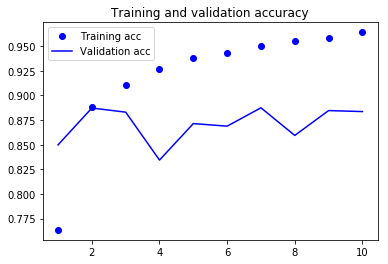

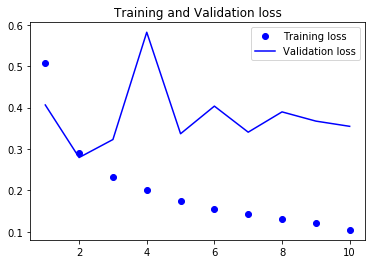

In [36]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")

In [39]:
data = pd.read_csv('./extract_seoul.csv')

In [40]:
data = data.drop(['Unnamed: 0'],1)

In [55]:
data['Date'] = pd.to_datetime(data['Date'])

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 30 columns):
Date               188 non-null datetime64[ns]
Total              188 non-null float64
Seoul              188 non-null float64
Northern seoul     188 non-null float64
Gangbuk-gu         188 non-null float64
Gwangjin-gu        188 non-null float64
Nowon-gu           188 non-null float64
Dobong-gu          188 non-null float64
Dongdaemun-gu      188 non-null float64
Mapo-gu            188 non-null float64
Seodaemun-gu       188 non-null float64
Seongdong-gu       188 non-null float64
Seongbuk-gu        188 non-null float64
Yongsan-gu         188 non-null float64
Eunpyeong-gu       188 non-null float64
Jongno-gu          188 non-null float64
Jung-gu            188 non-null float64
Jungnang-gu        188 non-null float64
Southern Seoul     188 non-null float64
Gangnam-gu         188 non-null float64
Gangdong-gu        188 non-null float64
Gangseo-gu         188 non-null float64
Gwanak-g

In [57]:
gangnam = data[['Date','Gangnam-gu']]

gangnam_data = np.array(data[['Date','Gangnam-gu']])
# gangnam_array = np.array(gangnam)
# gangnam_data = gangnam_array.reshape(-1,1)
# gangnam_data.shape

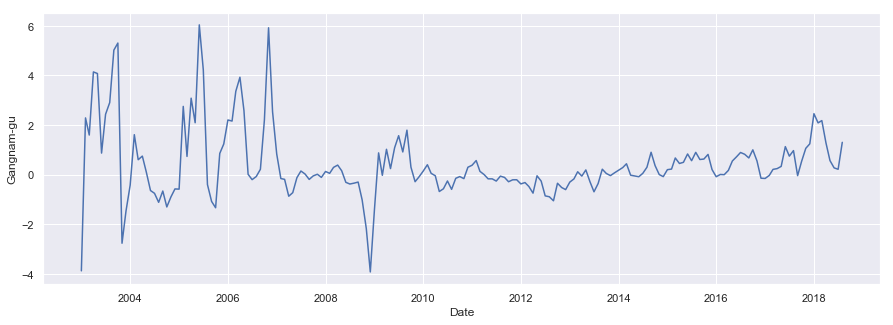

In [68]:
# Create a time series plot.
plt.figure(figsize = (15, 5))
ax = sns.lineplot(x="Date", y="Gangnam-gu", data=gangnam)

In [93]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import Adam

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

In [183]:
gangnam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
Date          188 non-null datetime64[ns]
Gangnam-gu    188 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.0 KB


In [186]:
mask = pd.to_datetime('2010-01-01')
tmp = gangnam.loc[:][gangnam['Date'] >= mask]

In [187]:
gangnam_tmp = tmp.drop('Date', 1)

In [188]:
gangnam_tmp

,Gangnam-gu
84,0.146998
85,0.401215
86,0.054086
87,-0.042543
88,-0.678413
89,-0.567626
90,-0.254231
91,-0.591100
92,-0.146213
93,-0.075991


### Normalize

In [189]:
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(gangnam_tmp)

In [190]:
dataset

array([[0.34161309],
       [0.41399694],
       [0.31515787],
       [0.28764442],
       [0.10659095],
       [0.13813561],
       [0.22736977],
       [0.13145184],
       [0.25812596],
       [0.27812051],
       [0.25453416],
       [0.38518202],
       [0.40807148],
       [0.4620269 ],
       [0.33802372],
       [0.30129167],
       [0.25218556],
       [0.25185434],
       [0.22652257],
       [0.28290495],
       [0.26834486],
       [0.21884845],
       [0.24098452],
       [0.24156698],
       [0.19396314],
       [0.2093965 ],
       [0.16411628],
       [0.08794883],
       [0.28715331],
       [0.22577299],
       [0.05649797],
       [0.04641818],
       [0.        ],
       [0.20161524],
       [0.15261872],
       [0.12839877],
       [0.21444004],
       [0.25118653],
       [0.33334945],
       [0.28397418],
       [0.35422305],
       [0.21846023],
       [0.1035275 ],
       [0.19847166],
       [0.36285748],
       [0.31389134],
       [0.28915095],
       [0.320

In [193]:
TRAIN_SIZE = 0.80

train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (83, 21)


In [194]:
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [346]:
window_size = 4

In [347]:
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)

whole_X, whole_Y = create_dataset(dataset, window_size)
print("Original training data shape:")
print(whole_X.shape)
print(whole_Y.shape)

Original training data shape:
(99, 4)
(99,)


In [348]:
train_Y[:10]

array([0.10659095, 0.13813561, 0.22736977, 0.13145184, 0.25812596,
       0.27812051, 0.25453416, 0.38518202, 0.40807148, 0.4620269 ])

In [349]:
# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

whole_X = np.reshape(whole_X, (whole_X.shape[0], 1, whole_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

New training data shape:
(78, 1, 4)


In [395]:
def fit_model(train_X, train_Y, window_size = 1):
    model = Sequential()
    model.add(LSTM(12,return_sequences=True, input_shape = (1, window_size)))
    model.add(LSTM(12,return_sequences=True))
    model.add(LSTM(12))
    model.add(Dense(1))
    
#     adam = Adam(lr=0.00146, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=1e-6, amsgrad=False)
    adam = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=1e-6, amsgrad=False)
    
    
    model.compile(loss = "mean_squared_error", 
                  optimizer = adam)
    model.fit(train_X, train_Y, epochs = 500, batch_size = 2, verbose = 2)
    
    return(model)

In [394]:
model1 = fit_model(train_X, train_Y, window_size)

Epoch 1/500
78/78 [==============================] - 5s 69ms/step - loss: 0.0999
Epoch 2/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0726
Epoch 3/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0455
Epoch 4/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0228
Epoch 5/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0137
Epoch 6/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0132
Epoch 7/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0129
Epoch 8/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0127
Epoch 9/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 10/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0122
Epoch 11/500
78/78 [==============================] - 0s 4ms/step - loss: 0.0122
Epoch 12/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0116
Epoch 13/500
78/78 [================

78/78 [==============================] - 0s 4ms/step - loss: 0.0070
Epoch 102/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 103/500
78/78 [==============================] - 0s 4ms/step - loss: 0.0068
Epoch 104/500
78/78 [==============================] - 0s 5ms/step - loss: 0.0069
Epoch 105/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 106/500
78/78 [==============================] - 0s 4ms/step - loss: 0.0068
Epoch 107/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 108/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 109/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 110/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 111/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 112/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 113/500
78/78 [=========

78/78 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 202/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 203/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 204/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 205/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 206/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 207/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 208/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 209/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 210/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 211/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 212/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 213/500
78/78 [=========

78/78 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 302/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 303/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 304/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 305/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 306/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 307/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 308/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 309/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 310/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 311/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 312/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 313/500
78/78 [=========

78/78 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 402/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 403/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 404/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 405/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 406/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 407/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 408/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 409/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0065
Epoch 410/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 411/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 412/500
78/78 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 413/500
78/78 [=========

In [378]:
def predict_and_score(model, X, Y):
    pred = scaler.inverse_transform(model.predict(X))
    # 0 ~ 1 inverse origin
    orig_data = scaler.inverse_transform([Y])
    
    #RMSE.
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)

In [396]:
rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)

whole_test, whole_predict = predict_and_score(model1, whole_X, whole_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)
print("Whole data score: %.2f RMSE " % whole_test)

Training data score: 0.28 RMSE
Test data score: 0.58 RMSE
Whole data score: 0.35 RMSE 


In [397]:
def start_predict_n_plot(dataset, train_predict, test_predict):
    train_predict_plot = np.empty_like(dataset)
    train_predict_plot[:, :] = np.nan
    
    ##땡기자
    print("window_size: ", window_size)
    train_predict_plot[(window_size - 1) : len(train_predict) + (window_size - 1)] = train_predict

    
    test_predict_plot = np.empty_like(dataset)
    test_predict_plot[:, :] = np.nan
#     test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1] = test_predict
    test_predict_plot[(window_size - 1): len(whole_predict) + (window_size - 1), :] = whole_predict
    
    print(test_predict_plot.shape)
    print(whole_predict.shape)

    plt.figure(figsize = (15, 5))
    plt.plot(scaler.inverse_transform(dataset), label = "True value")
    plt.plot(train_predict_plot, label = "Training set pred")
    plt.plot(test_predict_plot, label = "Test set pred")
    plt.xlabel("Month")
    plt.ylabel("Price")
    plt.title("Gangnam Train/test Predict")
    plt.legend()
    plt.show()

window_size:  4
(104, 1)
(99, 1)


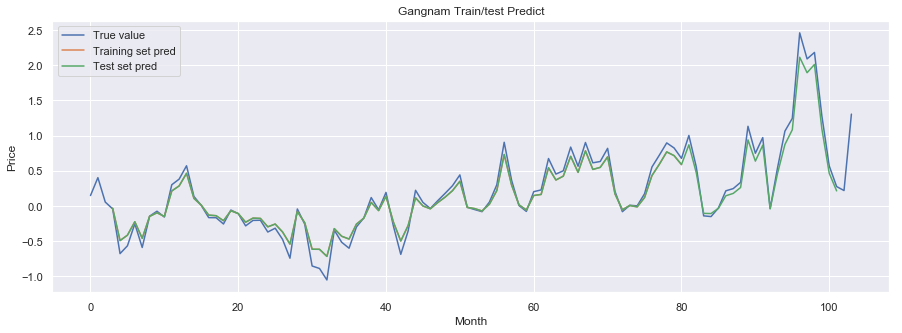

In [398]:
start_predict_n_plot(dataset, train_predict, test_predict)